## Data Acquisation and Cleaning

First, import the libraries and modules used, and use the Path module to create a 'safe' path for the data file, to be recognized in all OS

In [2]:
from pathlib import Path

import numpy as np # gotta check if np is ever used in my code
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path().resolve()

Data_PATH = DATA_DIR / "raw_data" / "w1inhome_dvn.sav"

if not Data_PATH.exists():
    raise FileNotFoundError(f"Could not find dataset at {Data_PATH}")

plt.style.use("seaborn-v0_8-whitegrid")
pd.options.display.float_format = "{:.2f}".format # might want to change these plotting settings for later

Second, load the raw data into a DataFrame object, to perform cleaning operations

In [3]:
# now time for cleaning into a compact DataFrame:
import pyreadstat # to read the SPSS file
data, meta = pyreadstat.read_sav(Data_PATH) # data contains the data frame. meta contains the metadata and encodings for values     

we have a lot of variables, since this is microdata, from selected variables, I will compute new indices and discard old values used to compute them, this will drastically reduce the number of variables I will be working with.

In [4]:
data.head() # display first 5 entries

,AID,IMONTH,IDAY,IYEAR,SCH_YR,BIO_SEX,VERSION,SMP01,SMP03,H1GI1M,...,PD4A,PD4B,PD4C,PD4D,PD4E,PD4F,PD5,PD5A,AH_PVT,AH_RAW
0,57100270,6.00,23.00,95.00,1.00,2.00,4,0.00,1.00,10.00,...,7.00,7.00,7.00,7.00,7.00,7.00,1.00,1.00,86.00,55.00
1,57101310,5.00,5.00,95.00,1.00,2.00,1,1.00,0.00,11.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.00,58.00
2,57103171,6.00,27.00,95.00,0.00,1.00,4,1.00,0.00,10.00,...,7.00,7.00,7.00,7.00,7.00,7.00,1.00,0.00,120.00,79.00
3,57103869,7.00,14.00,95.00,0.00,1.00,4,1.00,0.00,1.00,...,7.00,7.00,7.00,7.00,7.00,7.00,NaN,NaN,85.00,56.00
4,57104553,7.00,14.00,95.00,1.00,2.00,4,1.00,0.00,6.00,...,7.00,7.00,7.00,7.00,7.00,7.00,1.00,0.00,90.00,59.00


From the in-home interview Notebook, I have obtained the codes for the variables that I am interested in, I have compiled them into a list, called ordered_columns.

The following are the codes with the corresponding interview question:


In [5]:
ordered_columns = ['AID', 'H1GI1M', 'H1GI1Y', 'BIO_SEX', 'H1GI9', 'IYEAR', 'H1SU1', 'H1SU2', 'H1RM1', 'H1RF1', 'H1FS1', 'H1FS2',
                    'H1FS3', 'H1FS4', 'H1FS5', 'H1FS6', 'H1FS7', 'H1FS8', 'H1FS9', 'H1FS10', 'H1FS11', 'H1FS12', 'H1FS13',
                      'H1FS14', 'H1FS15', 'H1FS16', 'H1FS17', 'H1FS18', 'H1GH18', 'H1GH21', 'H1PF16', 'H1WP10', 'H1PF1',
                        'H1PF2', 'H1PF3', 'H1PF4', 'H1WP9', 'H1WP14', 'H1PF23', 'H1PF24', 'H1PF25', 'H1WP13', 'H1WP1', 'H1WP2',
                          'H1WP3', 'H1WP4', 'H1WP5', 'H1WP6', 'H1WP7', 'H1FV1', 'H1FV2', 'H1FV3', 'H1FV4', 'H1FV5', 'H1FV6', 'H1FV7']

In [6]:
select_vars_data = data[ordered_columns] # in the new data frame, only include the ordered columns
select_vars_data.head()

,AID,H1GI1M,H1GI1Y,BIO_SEX,H1GI9,IYEAR,H1SU1,H1SU2,H1RM1,H1RF1,...,H1WP5,H1WP6,H1WP7,H1FV1,H1FV2,H1FV3,H1FV4,H1FV5,H1FV6,H1FV7
0,57100270,10.00,77.00,2.00,2.00,95.00,0.00,7.00,8.00,8.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
1,57101310,11.00,76.00,2.00,2.00,95.00,0.00,7.00,1.00,7.00,...,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,57103171,10.00,79.00,1.00,1.00,95.00,0.00,7.00,4.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,57103869,1.00,77.00,1.00,2.00,95.00,1.00,0.00,2.00,97.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
4,57104553,6.00,76.00,2.00,2.00,95.00,1.00,0.00,4.00,97.00,...,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Replacing Missingness-corresponding values with NaN:

Now that we have the dataframe with the 56 variables selected, we need to consider missing values.
In the codebook some values that are missing might have several numbers indicating it, so we need 
to replace it with NaN. While looking at the codebook, there were some questions that had different 
values for missingness, so one must accommodate for that fact.


In [7]:
# Common missing value keywords found in survey data labels
missing_keywords = ['refused', 'don\'t know', 'not applicable', 'legitimate skip', 
                    'missing', 'skip', 'na', 'dk', 'rf']

def extract_missing_codes(value_labels):
    """
    Extract codes that represent missing values based on label text.
    
    Parameters:
    -----------
    value_labels : dict
        Dictionary mapping numeric codes to their text labels
        
    Returns:
    --------
    list : List of codes that represent missing values
    """
    missing_codes = []
    for code, label in value_labels.items():
        label_lower = str(label).lower()
        # Check if any missing keyword appears in the label
        if any(keyword in label_lower for keyword in missing_keywords):
            missing_codes.append(code)
    return missing_codes

# Create a copy to avoid modifying the original dataframe
select_vars_data = select_vars_data.copy()

# Iterate through all selected variables
for col in ordered_columns:
    
    # Skip the ID column - we don't want to mark any IDs as missing
    if col == 'AID':
        continue
    
    # --- Method 1: Extract missing codes from value labels ---
    # This handles cases where missing values are defined in the codebook labels
    value_labels = meta.variable_value_labels.get(col, {})
    
    if value_labels:
        # Extract codes that represent missing values
        missing_codes = extract_missing_codes(value_labels)
        
        if missing_codes:
            # Create replacement dictionary mapping missing codes to NaN
            clean_dict = {code: np.nan for code in missing_codes}
            select_vars_data[col] = select_vars_data[col].replace(clean_dict)
    
    # --- Method 2: Exact missing values from metadata ---
    # This handles cases where missing values are explicitly defined in metadata
    missing_vals = meta.missing_user_values.get(col, [])
    
    if missing_vals:
        # Create dictionary mapping each missing value to NaN
        clean_dict = {int(val): np.nan for val in missing_vals}
        # Replace the missing value codes with NaN
        select_vars_data[col] = select_vars_data[col].replace(clean_dict)

    # --- Method 3: Range-based missingness from metadata ---
    # This handles cases where missing values fall within a specified range (e.g., 96-99)
    missing_ranges = meta.missing_ranges.get(col, [])

    for lo, hi in missing_ranges:
        lo, hi = int(lo), int(hi)
        # Mask all values within the range [lo, hi] as NaN
        select_vars_data[col] = select_vars_data[col].mask(
            select_vars_data[col].between(lo, hi), np.nan
        )

# Display summary of missing values after cleaning 
print(f"Total missing values across all columns: {select_vars_data.isna().sum().sum()}")
print(f"\nMissing values by column:")
print(select_vars_data.isna().sum())

Total missing values across all columns: 28341

Missing values by column:
AID           0
H1GI1M        3
H1GI1Y        3
BIO_SEX       1
H1GI9        79
IYEAR         0
H1SU1      5683
H1SU2      6274
H1RM1       427
H1RF1      2010
H1FS1        22
H1FS2        17
H1FS3        24
H1FS4        21
H1FS5        19
H1FS6        20
H1FS7        17
H1FS8        29
H1FS9        27
H1FS10       17
H1FS11       15
H1FS12       19
H1FS13       19
H1FS14       15
H1FS15       18
H1FS16       14
H1FS17       18
H1FS18       20
H1GH18        8
H1GH21        8
H1PF16       62
H1WP10      374
H1PF1       385
H1PF2       386
H1PF3       384
H1PF4       382
H1WP9       375
H1WP14     1957
H1PF23     1963
H1PF24     1965
H1PF25     1965
H1WP13     1957
H1WP1       151
H1WP2       142
H1WP3       141
H1WP4       141
H1WP5       142
H1WP6       141
H1WP7       139
H1FV1        53
H1FV2        49
H1FV3        48
H1FV4        47
H1FV5        49
H1FV6        50
H1FV7        46
dtype: int64


In [8]:
select_vars_data.head()

,AID,H1GI1M,H1GI1Y,BIO_SEX,H1GI9,IYEAR,H1SU1,H1SU2,H1RM1,H1RF1,...,H1WP5,H1WP6,H1WP7,H1FV1,H1FV2,H1FV3,H1FV4,H1FV5,H1FV6,H1FV7
0,57100270,10.00,77.00,2.00,2.00,95.00,NaN,NaN,8.00,8.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
1,57101310,11.00,76.00,2.00,2.00,95.00,NaN,NaN,1.00,7.00,...,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,57103171,10.00,79.00,1.00,1.00,95.00,NaN,NaN,4.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,57103869,1.00,77.00,1.00,2.00,95.00,1.00,NaN,2.00,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
4,57104553,6.00,76.00,2.00,2.00,95.00,1.00,NaN,4.00,NaN,...,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Now it turns out that I need to do some reverse-coding for some categories:

In [9]:
# Reverse code CES-D items (0–3 scale)
cesd_reverse_items = ["H1FS4", "H1FS8", "H1FS11", "H1FS15"]
for col in cesd_reverse_items:
    select_vars_data[col + "_r"] = 3 - select_vars_data[col]

# Reverse code impulsivity (1–5 scale)
select_vars_data["H1PF16_r"] = 6 - select_vars_data["H1PF16"]


In [10]:
print(select_vars_data[["H1FS4", "H1FS4_r"]].head())
select_vars_data[["H1PF16", "H1PF16_r"]].head()


   H1FS4  H1FS4_r
0   3.00     0.00
1   2.00     1.00
2   3.00     0.00
3   0.00     3.00
4   1.00     2.00


,H1PF16,H1PF16_r
0,4.00,2.00
1,2.00,4.00
2,5.00,1.00
3,5.00,1.00
4,2.00,4.00


# Calculation of indices:
I will compress the data corresponding to questions about one category into one index, then I will omitt the categories used for the computations

In [11]:
# 1. CES-D DEPRESSION SCORE (mean of 18 items)

cesd_items = [
    "H1FS1", "H1FS2", "H1FS3", "H1FS4_r", "H1FS5", "H1FS6",
    "H1FS7", "H1FS8_r", "H1FS9", "H1FS10", "H1FS11_r",
    "H1FS12", "H1FS13", "H1FS14", "H1FS15_r", "H1FS16",
    "H1FS17", "H1FS18"
]

select_vars_data["cesd_score"] = select_vars_data[cesd_items].mean(axis=1)


In [12]:
# impulsivity index:
select_vars_data["impulsivity"] = select_vars_data["H1PF16_r"]


In [13]:
# parents-present index:

select_vars_data["mother_present"] = (
    ~select_vars_data["H1RM1"].isin([97, np.nan])
).astype(int)

select_vars_data["father_present"] = (
    ~select_vars_data["H1RF1"].isin([97, 99, np.nan])
).astype(int)

In [14]:
warmth_items = [
    # Mother warmth/connection
    "H1WP10", "H1PF1", "H1PF2", "H1PF3", "H1PF4", "H1WP9",
    
    # Father warmth/connection
    "H1WP14", "H1PF23", "H1PF24", "H1PF25", "H1WP13"
]
# parental warmth index:
select_vars_data["parental_warmth"] = select_vars_data[warmth_items].mean(axis=1)


In [15]:
monitoring_items = [
    "H1WP1", "H1WP2", "H1WP3", "H1WP4",
    "H1WP5", "H1WP6", "H1WP7"
]
# parental monitoring index:
select_vars_data["parental_monitoring"] = select_vars_data[monitoring_items].mean(axis=1)


In [16]:
ace_items_victim = [
    "H1FV1", "H1FV2", "H1FV3", "H1FV4", "H1FV5", "H1FV6"
]
# index showing the vicimization to adverse childhood experiences
select_vars_data["ace_victim"] = (
    select_vars_data[ace_items_victim]
    .replace({1: 1, 2: 1})
    .sum(axis=1)
)


In [17]:
select_vars_data["suicidal_ideation"] = (
    select_vars_data["H1SU1"] == 1
).astype(int)

# binary value --> returns 1 if the respondent has considered suicide, 0 otherwise


In [18]:
select_vars_data["suicide_attempt"] = (
    select_vars_data["H1SU2"] > 0
).astype(int)

# binary value --> returns 1 if the respondent attempted suicide atleast once, 0 otherwise

In [19]:
# Compute simple age (year-level)
select_vars_data["age"] = (
    select_vars_data["IYEAR"] - select_vars_data["H1GI1Y"]
)

Renaming Columns and Annotating Categorical-corresponding Values:

In [20]:
rename_dict = {
    "AID": "id",
    "BIO_SEX": "sex",
    "H1GI9": "race",
    "IYEAR": "interview_year",
    "H1RM1": "mother_edu",
    "H1RF1": "father_edu",
    "H1SU1": "suicidal_thought_raw",
    "H1SU2": "suicide_attempt_raw",
    "H1GI1Y": "birth_year",     
    "H1GI1M": "birth_month"     
}

select_vars_data = select_vars_data.rename(columns=rename_dict)

# annotate sex

select_vars_data["sex_cat"] = select_vars_data["sex"].map({
    1.0: "Male",
    2.0: "Female"
})


# annotate race

select_vars_data["race_cat"] = select_vars_data["race"].map({
    1.0: "White",
    2.0: "Black",
    3.0: "Native American",
    4.0: "Asian/Pacific Islander",
    5.0: "Other"
})


# annnotate parent education


mother_map = {
    1: "8th grade or less",
    2: "Some high school",
    3: "Trade school (no HS)",
    4: "High school graduate",
    5: "GED",
    6: "Trade school (after HS)",
    7: "Some college",
    8: "College graduate",
    9: "Postgraduate",
    10: "Never attended school"
}

select_vars_data["mother_edu_cat"] = select_vars_data["mother_edu"].map(mother_map)

father_map = mother_map.copy()
father_map[10] = "Never attended school"

select_vars_data["father_edu_cat"] = select_vars_data["father_edu"].map(father_map)


# annotate suicidality (raw items)

select_vars_data["suicidal_thought_cat"] = select_vars_data["suicidal_thought_raw"].map({
    0.0: "No",
    1.0: "Yes"
})

select_vars_data["suicide_attempt_cat"] = select_vars_data["suicide_attempt_raw"].map({
    0.0: "None",
    1.0: "1 time",
    2.0: "2-3 times",
    3.0: "4-5 times",
    4.0: "6+ times"
})


Drop columns (Those used for computing indices)

In [21]:
columns_to_drop = [
    # raw demographics (keeping only categorical versions)
    "sex",
    "race",
    "mother_edu",
    "father_edu",

    # raw suicidality
    "suicidal_thought_raw",
    "suicide_attempt_raw",

    # CES-D raw items
    *[f"H1FS{i}" for i in range(1, 19)],

    # CES-D reverse-coded items
    "H1FS4_r", "H1FS8_r", "H1FS11_r", "H1FS15_r",

    # impulsivity raw item
    "H1PF16",

    # parental warmth raw items
    "H1PF1", "H1PF2", "H1PF3", "H1PF4",
    "H1PF23", "H1PF24", "H1PF25",

    # parent closeness/caring (raw)
    "H1WP9", "H1WP10", "H1WP13", "H1WP14",

    # autonomy/monitoring items
    "H1WP1", "H1WP2", "H1WP3", "H1WP4",
    "H1WP5", "H1WP6", "H1WP7",

    # violence raw items
    "H1FV1","H1FV2","H1FV3","H1FV4","H1FV5","H1FV6","H1FV7",

    # remove categorical suicidality if not needed
    "suicidal_thought_cat",
    "suicide_attempt_cat",

    # also variables corresponding to the impulsivity question, insomenia, and crying question
    "H1PF16_r",
    "H1GH18",
    "H1GH21"
]

select_vars_data = select_vars_data.drop(columns=columns_to_drop, errors="ignore")


In [22]:
select_vars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6504 non-null   object 
 1   birth_month          6501 non-null   float64
 2   birth_year           6501 non-null   float64
 3   interview_year       6504 non-null   float64
 4   cesd_score           6491 non-null   float64
 5   impulsivity          6442 non-null   float64
 6   mother_present       6504 non-null   int64  
 7   father_present       6504 non-null   int64  
 8   parental_warmth      6370 non-null   float64
 9   parental_monitoring  6367 non-null   float64
 10  ace_victim           6504 non-null   float64
 11  suicidal_ideation    6504 non-null   int64  
 12  suicide_attempt      6504 non-null   int64  
 13  age                  6501 non-null   float64
 14  sex_cat              6503 non-null   object 
 15  race_cat             6425 non-null   o

In [23]:
select_vars_data.head(10)

,id,birth_month,birth_year,interview_year,cesd_score,impulsivity,mother_present,father_present,parental_warmth,parental_monitoring,ace_victim,suicidal_ideation,suicide_attempt,age,sex_cat,race_cat,mother_edu_cat,father_edu_cat
0,57100270,10.00,77.00,95.00,0.50,2.00,1,1,2.82,0.71,1.00,0,0,18.00,Female,Black,College graduate,College graduate
1,57101310,11.00,76.00,95.00,0.61,4.00,1,1,2.55,1.00,0.00,0,0,19.00,Female,Black,8th grade or less,Some college
2,57103171,10.00,79.00,95.00,0.06,1.00,1,1,2.55,0.14,0.00,0,0,16.00,Male,White,High school graduate,Some high school
3,57103869,1.00,77.00,95.00,1.22,1.00,1,0,2.83,0.14,2.00,1,0,18.00,Male,Black,Some high school,NaN
4,57104553,6.00,76.00,95.00,0.44,4.00,1,0,2.83,1.00,0.00,1,0,19.00,Female,Black,High school graduate,NaN
5,57104649,12.00,81.00,95.00,0.72,5.00,1,1,2.55,0.86,1.00,0,0,14.00,Male,Black,Postgraduate,High school graduate
6,57104676,10.00,83.00,95.00,0.61,4.00,0,0,2.64,0.29,2.00,0,0,12.00,Male,Black,NaN,NaN
7,57109625,3.00,81.00,95.00,0.44,3.00,1,0,3.33,0.57,1.00,0,0,14.00,Male,White,8th grade or less,NaN
8,57110897,9.00,81.00,95.00,0.61,4.00,1,0,3.50,0.71,0.00,0,0,14.00,Male,Black,High school graduate,NaN
9,57111071,6.00,81.00,95.00,0.33,2.00,1,0,3.17,0.43,0.00,0,0,14.00,Male,White,College graduate,NaN


## Data Enrichment

To address the part of my research question that inquires about the variability with respect to socioeconomic groups, I have used the Add Health Public Use Contextual Database, which already links each respondants ID with context variables. These variables were calculated from governmental data namely Block group level data from the Census of Population and Housing, 1990: Summary Tape
File 3A (STF 3A). In other words, the context variables describe the respondant's block of residence.

The next code cells handle the variable selection and cleaning of the contextual data file, I have stored the data used for analysis in a separate DataFrame from that holding the core data.

In [24]:
# preparing the data path
Context_Data_PATH = DATA_DIR / "raw_data" / "w1context_dvn.sav"

if not Context_Data_PATH.exists():
    raise FileNotFoundError(f"Could not find dataset at {Context_Data_PATH}")

In [25]:
# now time for cleaning into a compact DataFrame:
context_data, context_meta = pyreadstat.read_sav(Context_Data_PATH) # context_data contains the data frame. context_meta contains the metadata and encodings for values     

In [26]:
context_data.info() # initial inspection of the data

''' as mentioned in the User Documentation, 
the first 3 variables in the public use context database are 
the ID (AID), MATCH (tells if the geocode has been matched, only for the purpose of this project),
and MOVER (Insignificant for this project). The other 29 variables are the main context variables,
also we can observe that there are no missing values reported, this makes sense since the file uses specific integers to denote missingness
(which are numbers 8 and 9)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AID       6504 non-null   object 
 1   MATCH     6504 non-null   float64
 2   MOVER     6504 non-null   float64
 3   BST90P01  6504 non-null   float64
 4   BST90P02  6504 non-null   float64
 5   BST90P03  6504 non-null   float64
 6   BST90P04  6504 non-null   float64
 7   BST90P05  6504 non-null   float64
 8   BST90P06  6504 non-null   float64
 9   BST90P07  6504 non-null   float64
 10  BST90P08  6504 non-null   float64
 11  BST90P09  6504 non-null   float64
 12  BST90P10  6504 non-null   float64
 13  BST90P11  6504 non-null   float64
 14  BST90P12  6504 non-null   float64
 15  BST90P13  6504 non-null   float64
 16  BST90P14  6504 non-null   float64
 17  BST90P15  6504 non-null   float64
 18  BST90P16  6504 non-null   float64
 19  BST90P17  6504 non-null   float64
 20  BST90P18  6504 non-null   floa

' as mentioned in the User Documentation, \nthe first 3 variables in the public use context database are \nthe ID (AID), MATCH (tells if the geocode has been matched, only for the purpose of this project),\nand MOVER (Insignificant for this project). The other 29 variables are the main context variables,\nalso we can observe that there are no missing values reported, this makes sense since the file uses specific integers to denote missingness\n(which are numbers 8 and 9)\n'

In [27]:
# Cleaning:

# I want to drop rows such that MATCH == 0, since if that is the case, then we have no contextual data for this respondant

clean_context = context_data[context_data["MATCH"] != 0].copy() # uses boolean selection, AI-generated (Gemini)
clean_context.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6431 entries, 0 to 6503
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AID       6431 non-null   object 
 1   MATCH     6431 non-null   float64
 2   MOVER     6431 non-null   float64
 3   BST90P01  6431 non-null   float64
 4   BST90P02  6431 non-null   float64
 5   BST90P03  6431 non-null   float64
 6   BST90P04  6431 non-null   float64
 7   BST90P05  6431 non-null   float64
 8   BST90P06  6431 non-null   float64
 9   BST90P07  6431 non-null   float64
 10  BST90P08  6431 non-null   float64
 11  BST90P09  6431 non-null   float64
 12  BST90P10  6431 non-null   float64
 13  BST90P11  6431 non-null   float64
 14  BST90P12  6431 non-null   float64
 15  BST90P13  6431 non-null   float64
 16  BST90P14  6431 non-null   float64
 17  BST90P15  6431 non-null   float64
 18  BST90P16  6431 non-null   float64
 19  BST90P17  6431 non-null   float64
 20  BST90P18  6431 non-null   float64
 

In [48]:
# now we need to select the varaibles:

context_vars = ['AID', 'BST90P01', 'BST90P02', 'BST90P06', 'BST90P13', 'BST90P15', 'BST90P16', 'BST90P17',
                 'BST90P18', 'BST90P19', 'BST90P20', 'BST90P23', 'BST90P24'] # these are the variables that strongly resemble the socioeconomic status
# + the ID to link with the respondants
refined_context = clean_context[context_vars].copy() # assign it to a new DataFrame
refined_context.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6431 entries, 0 to 6503
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AID       6431 non-null   object 
 1   BST90P01  6431 non-null   float64
 2   BST90P02  6431 non-null   float64
 3   BST90P06  6431 non-null   float64
 4   BST90P13  6431 non-null   float64
 5   BST90P15  6431 non-null   float64
 6   BST90P16  6431 non-null   float64
 7   BST90P17  6431 non-null   float64
 8   BST90P18  6431 non-null   float64
 9   BST90P19  6431 non-null   float64
 10  BST90P20  6431 non-null   float64
 11  BST90P23  6431 non-null   float64
 12  BST90P24  6431 non-null   float64
dtypes: float64(12), object(1)
memory usage: 703.4+ KB


In [ ]:
# the user's guide states that for floating point values and larger numbers, the missing values are encoded as 8 preceded by a number of 9's (padded),
# or 9 preceded by a number of 9'sample
# for integer-valued variables, we have either 9 or 8 to encode missingness
# to all these cases, I will use a regular expression (thank you automata theory)

pattern = r"^9*[89](\.0+)?$" # starts with 0 or more 9 and ends with either an 8 or a 9, optionally ending with a decimal point and atleast one 0

refined_context = refined_context.astype(str) # convert the values in the original dataframe to strings to allow for regex detection
# according to pandas docs, this should replace the original dataframe with the string-valued data frame
refined_context = refined_context.replace(pattern, np.nan, regex=True) # replace with NaN
refined_context = refined_context.apply(pd.to_numeric) # back to numbers
refined_context.info()

# NOTE: I have used Gemini to get the appropriate methods, yet the workflow is my suggestion

<class 'pandas.core.frame.DataFrame'>
Index: 6431 entries, 0 to 6503
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AID       6431 non-null   int64  
 1   BST90P01  6428 non-null   float64
 2   BST90P02  6420 non-null   float64
 3   BST90P06  6420 non-null   float64
 4   BST90P13  6220 non-null   float64
 5   BST90P15  6220 non-null   float64
 6   BST90P16  6220 non-null   float64
 7   BST90P17  5800 non-null   float64
 8   BST90P18  5800 non-null   float64
 9   BST90P19  6428 non-null   float64
 10  BST90P20  6395 non-null   float64
 11  BST90P23  6312 non-null   float64
 12  BST90P24  6251 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 703.4 KB


In [ ]:
# rename variables
'''
['AID', 'BST90P01', 'BST90P02', 'BST90P06', 'BST90P13', 'BST90P15', 'BST90P16', 'BST90P17',
                 'BST90P18', 'BST90P19', 'BST90P20', 'BST90P23', 'BST90P24'] --> list of chosen  context variables for reference
'''
labels = {}
labels['AID'] = 'id'
labels['BST90P01'] = 'Urbanicity'
labels['BST90P02'] = 'Modal Race'
labels['BST90P06'] = 'Median Age'



{'AID': 'RESPONDENT IDENTIFIER', 'BST90P01': 'Urbanicity Code (Urban/Not Urban)', 'BST90P02': 'Modal Race', 'BST90P06': 'Median Age', 'BST90P13': 'Modal Household Type', 'BST90P15': 'Median Household Income', 'BST90P16': 'Dispersion in Household Income', 'BST90P17': 'Median Family Income', 'BST90P18': 'Dispersion in Family Income', 'BST90P19': 'Prop Under Poverty (Low/Medium/High)', 'BST90P20': 'Modal Educational Attainment', 'BST90P23': 'Unemployment Rate (Low/Medium/High)', 'BST90P24': 'Modal Occupation'}


## Exploratory Data Analysis

First, I will inspect basic structure of my data

In [31]:
select_vars_data.describe(include='all')

,id,birth_month,birth_year,interview_year,cesd_score,impulsivity,mother_present,father_present,parental_warmth,parental_monitoring,ace_victim,suicidal_ideation,suicide_attempt,age,sex_cat,race_cat,mother_edu_cat,father_edu_cat
count,6504,6501.00,6501.00,6504.00,6491.00,6442.00,6504.00,6504.00,6370.00,6367.00,6504.00,6504.00,6504.00,6501.00,6503,6425,5856,4289
unique,6504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,10,10
top,57100270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,White,High school graduate,High school graduate
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3356,4291,1811,1302
mean,NaN,6.56,78.96,95.00,0.60,2.98,0.93,0.69,2.85,0.74,0.73,0.13,0.04,16.04,NaN,NaN,NaN,NaN
std,NaN,3.40,1.77,0.01,0.40,1.13,0.25,0.46,0.35,0.22,1.16,0.33,0.18,1.77,NaN,NaN,NaN,NaN
min,NaN,1.00,74.00,94.00,0.00,1.00,0.00,0.00,1.40,0.00,0.00,0.00,0.00,12.00,NaN,NaN,NaN,NaN
25%,NaN,4.00,78.00,95.00,0.28,2.00,1.00,0.00,2.55,0.57,0.00,0.00,0.00,15.00,NaN,NaN,NaN,NaN
50%,NaN,7.00,79.00,95.00,0.50,3.00,1.00,1.00,2.82,0.71,0.00,0.00,0.00,16.00,NaN,NaN,NaN,NaN
75%,NaN,9.00,80.00,95.00,0.83,4.00,1.00,1.00,3.09,0.86,1.00,0.00,0.00,17.00,NaN,NaN,NaN,NaN


# Interpretation of Descriptive Statistics
## 1. Demographic Variables
- **Age:** Mean age is around 16 (range 12–21), indicating an adolescent sample, which is the age group this project targets.
- **Sex:** Two categories
- **Race:** Four categories, with White as the most frequent (freq = 4,291).
- **Birth month/year and interview year** show complete distribution consistency, with no unexpected values. (Interview was held in the years 1994-1995)

## 2. Mental Health & Behavioral Variables
- **CES-D Depression Score:**  
  Mean = 0.60, SD = 0.40 (scaled 0–3). This suggests moderate variability in depressive symptoms within the sample.
- **Impulsivity:**  
  Mean = 2.98 (1–5 scale), indicating moderate impulsivity levels.
- **Suicidal Ideation and Suicide Attempt:**  
  Binary variables with low means (0.13 and 0.04). Suicidal attempts are rare, while ideation is present but still infrequent, consistent with adolescent population data.


## 3. Family Structure & Upbringing Variables
- **Mother Present:** Mean = 0.93  
- **Father Present:** Mean = 0.69  
  This reflects that adolescents are more commonly residing with mothers than fathers, knowing that these reflect mother and father **figures**,
  i.e. they indicate the presence of a biological, step, foster, or any other person to play the role of that parent within home.
- **Parental Warmth:** Mean = 2.85 (range 1.4–5), indicating generally high warmth.
- **Parental Monitoring:** Mean = 0.74, showing relatively low to moderate monitoring.
- **ACE Victimization:** Mean = 0.73, with a range from 0 to 6, reflecting substantial variation in exposure to adverse childhood experiences.

## 4. Socioeconomic Indicators
- **Mother’s Education:** 10 categories, with “High school graduate” being the most common (freq = 1,811).
- **Father’s Education:** Also 10 categories, with “High school graduate” as the modal category (freq = 1,302).
- Parental education variables have more missing data relative to others (especially father’s education).


## Univariate Distributions

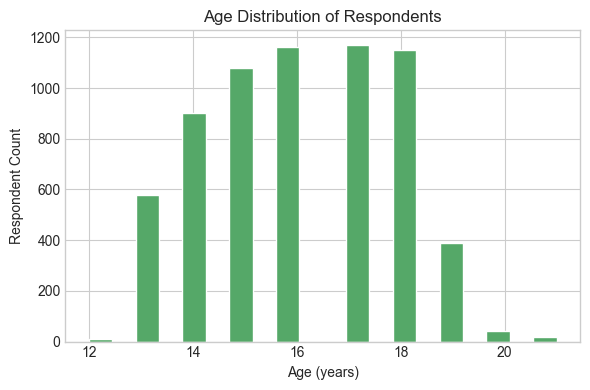

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(select_vars_data["age"].dropna(), bins=20, color="#55a868", edgecolor="white")
ax.set_title("Age Distribution of Respondents")
ax.set_xlabel("Age (years)")
ax.set_ylabel("Respondent Count")
fig.tight_layout()
plt.show()

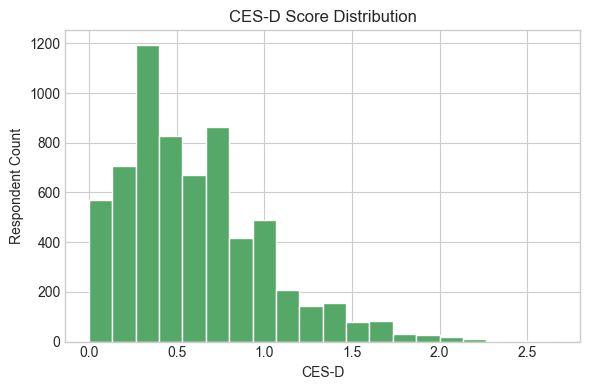

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(select_vars_data["cesd_score"].dropna(), bins=20, color="#55a868", edgecolor="white")
ax.set_title("CES-D Score Distribution")
ax.set_xlabel("CES-D")
ax.set_ylabel("Respondent Count")
fig.tight_layout()
plt.show()

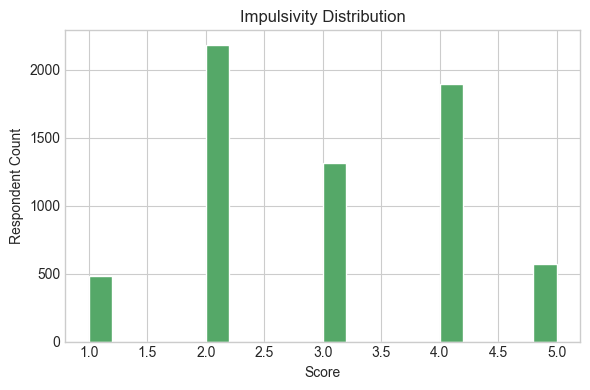

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(select_vars_data["impulsivity"].dropna(), bins=20, color="#55a868", edgecolor="white")
ax.set_title("Impulsivity Distribution")
ax.set_xlabel("Score")
ax.set_ylabel("Respondent Count")
fig.tight_layout()
plt.show()

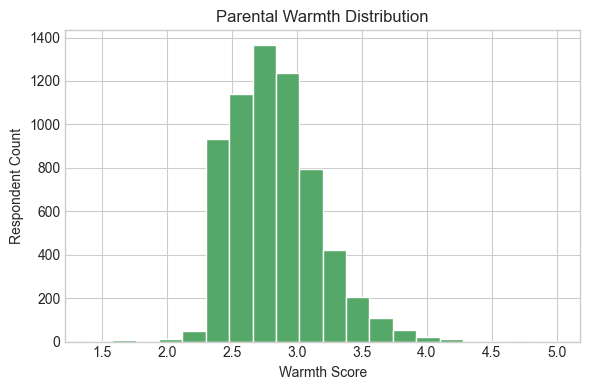

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(select_vars_data["parental_warmth"].dropna(), bins=20, color="#55a868", edgecolor="white")
ax.set_title("Parental Warmth Distribution")
ax.set_xlabel("Warmth Score")
ax.set_ylabel("Respondent Count")
fig.tight_layout()
plt.show()

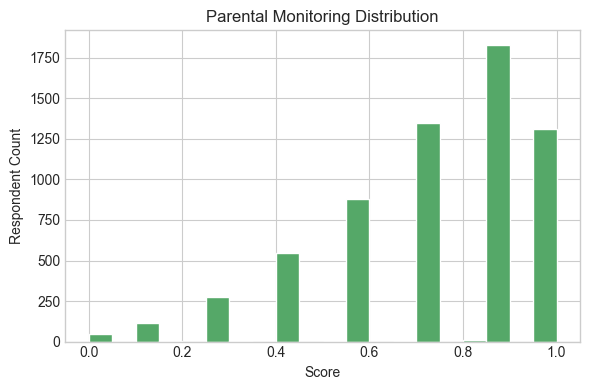

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(select_vars_data["parental_monitoring"].dropna(), bins=20, color="#55a868", edgecolor="white")
ax.set_title("Parental Monitoring Distribution")
ax.set_xlabel("Score")
ax.set_ylabel("Respondent Count")
fig.tight_layout()
plt.show()

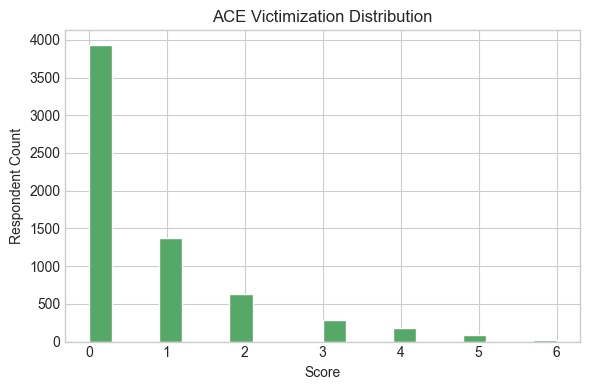

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(select_vars_data["ace_victim"].dropna(), bins=20, color="#55a868", edgecolor="white")
ax.set_title("ACE Victimization Distribution")
ax.set_xlabel("Score")
ax.set_ylabel("Respondent Count")
fig.tight_layout()
plt.show()

## Categorical Variables: Bar Charts

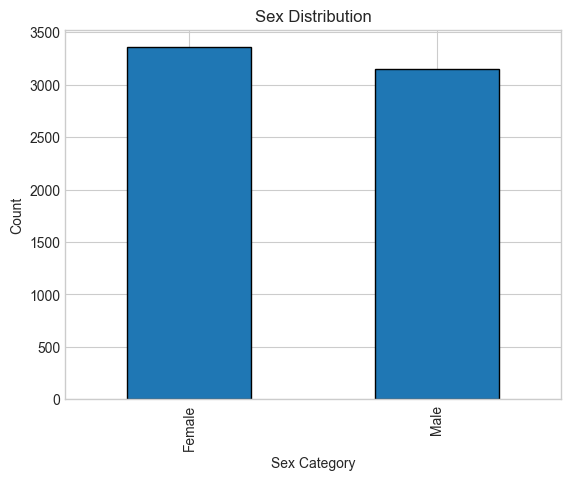

In [38]:
select_vars_data["sex_cat"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Sex Distribution")
plt.xlabel("Sex Category")
plt.ylabel("Count")
plt.show()

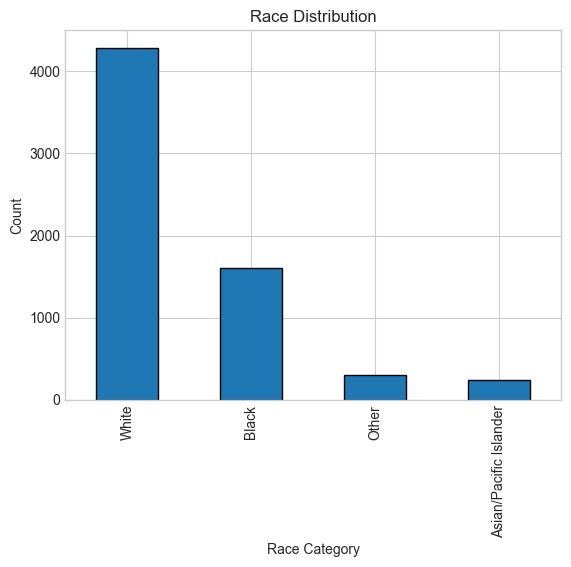

In [39]:
select_vars_data["race_cat"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Race Distribution")
plt.xlabel("Race Category")
plt.ylabel("Count")
plt.show()

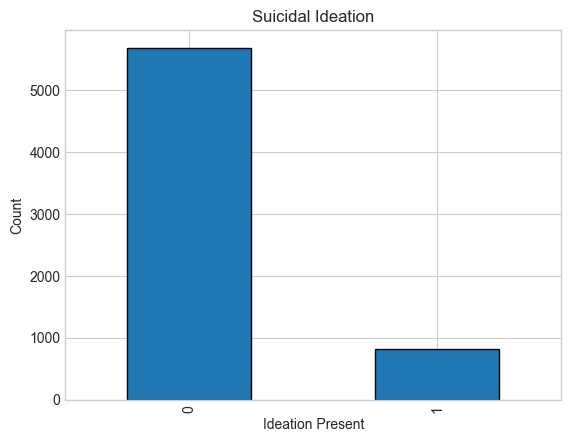

In [40]:
select_vars_data["suicidal_ideation"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Suicidal Ideation")
plt.xlabel("Ideation Present")
plt.ylabel("Count")
plt.show()

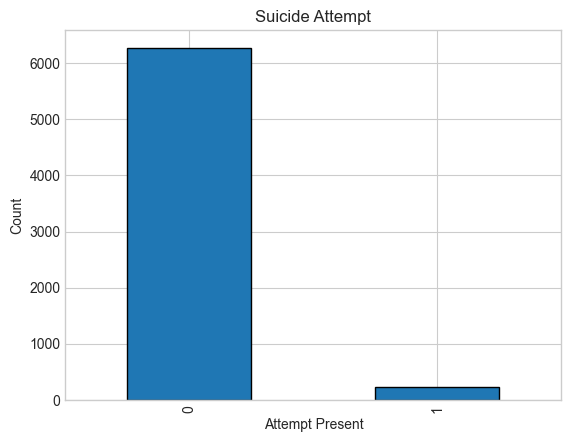

In [41]:
select_vars_data["suicide_attempt"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Suicide Attempt")
plt.xlabel("Attempt Present")
plt.ylabel("Count")
plt.show()

## Bivareate Relationships

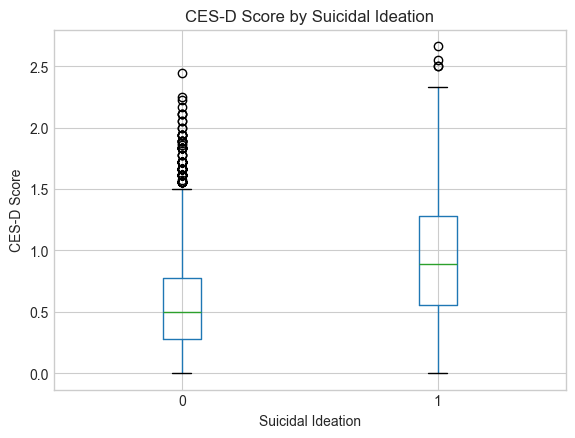

In [42]:
select_vars_data.boxplot(column="cesd_score", by="suicidal_ideation")
plt.title("CES-D Score by Suicidal Ideation")
plt.suptitle("")  
plt.xlabel("Suicidal Ideation")
plt.ylabel("CES-D Score")
plt.show()

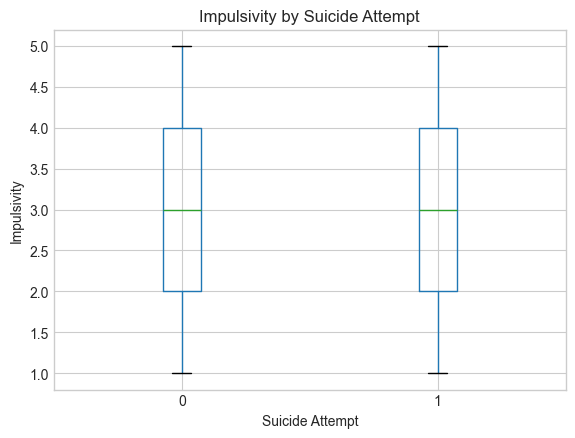

In [43]:
select_vars_data.boxplot(column="impulsivity", by="suicide_attempt")
plt.title("Impulsivity by Suicide Attempt")
plt.suptitle("")
plt.xlabel("Suicide Attempt")
plt.ylabel("Impulsivity")
plt.show()

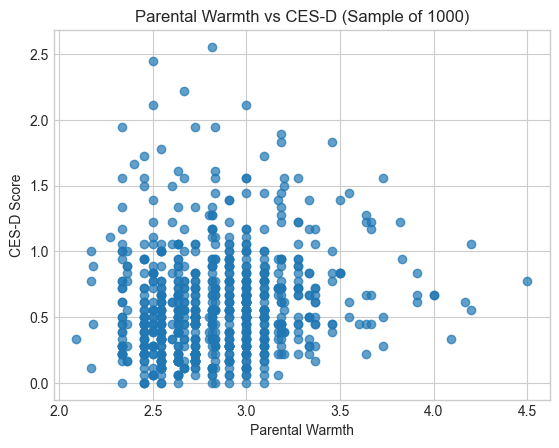

In [44]:
sample = select_vars_data.sample(n=800, random_state=42)
plt.scatter(sample["parental_warmth"], sample["cesd_score"], alpha=0.7)
plt.title("Parental Warmth vs CES-D (Sample of 1000)")
plt.xlabel("Parental Warmth")
plt.ylabel("CES-D Score")
plt.show()

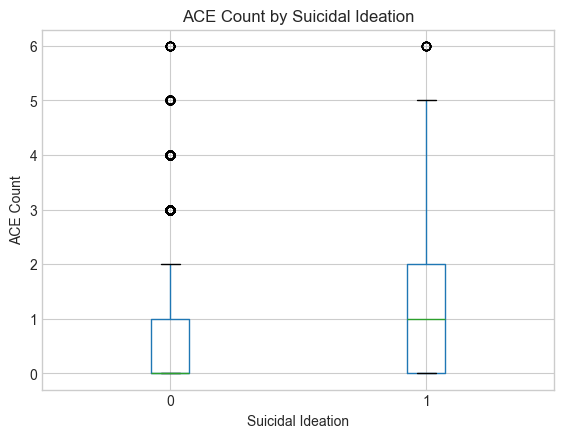

In [45]:
select_vars_data.boxplot(column="ace_victim", by="suicidal_ideation")
plt.title("ACE Count by Suicidal Ideation")
plt.suptitle("")
plt.xlabel("Suicidal Ideation")
plt.ylabel("ACE Count")
plt.show()

## Hypotheses:
# Under Construction:

Since I have not yet found the enrichment data, this section is limited to stating some Hypotheses to be tested:

for all variables considered to be upbringing factors:

H0: This variable does not predict suicidal ideation among adolescents.
H1: This variable does predict suicidal ideation among adolescents.

For depression:

H0: CES-D depression scores do not predict suicidal ideation.

H1: Higher CES-D scores predict higher suicidal ideation.

For Impulsivity:

H0: Impulsivity does not predict suicidal ideation.

H1: Higher impulsivity predicts increased suicidal ideation.


(I ran out of time while searching for enrichment data, that is why this section is lacking)
- 